## EDA on Advertising Sales

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Load the dataset

In [2]:
import pandas as pd
df= pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.shape

(200, 4)

In [5]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Descriptive Analysis

Datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Statistics

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


## Data Visualization

Dataset has only continuous features i.e quantitative data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Univariate Analysis

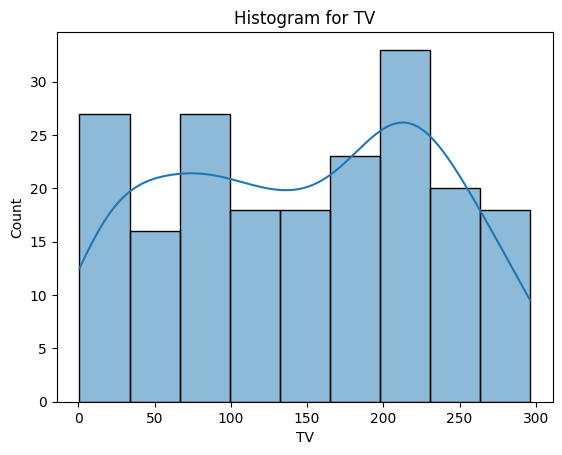

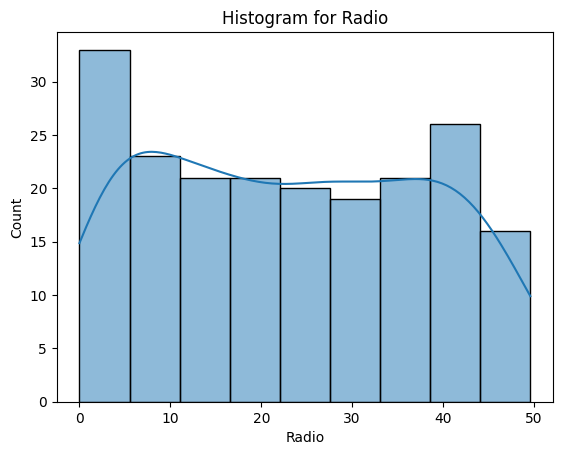

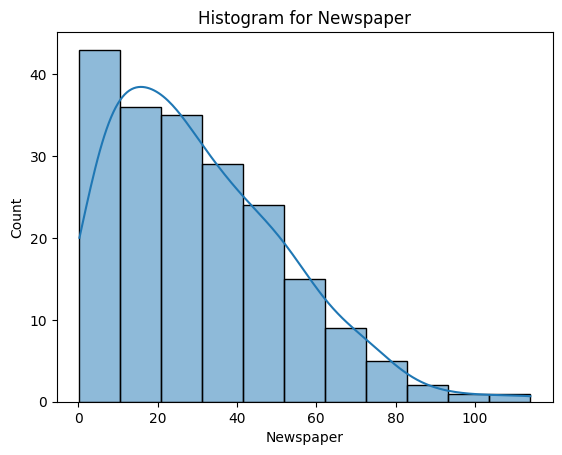

In [11]:
con = ['TV','Radio','Newspaper']
for i in con:
    sns.histplot(df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

we can observe skeweness in the Newspaper data. lets perform log transform to remove skeweness

In [12]:
df['Newspaper'] = round(np.log10(df['Newspaper']),1)

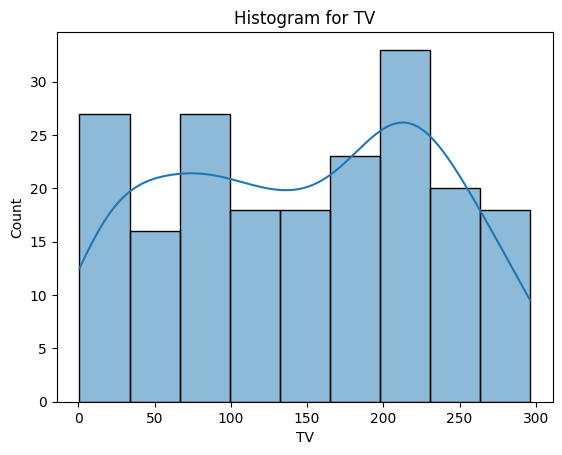

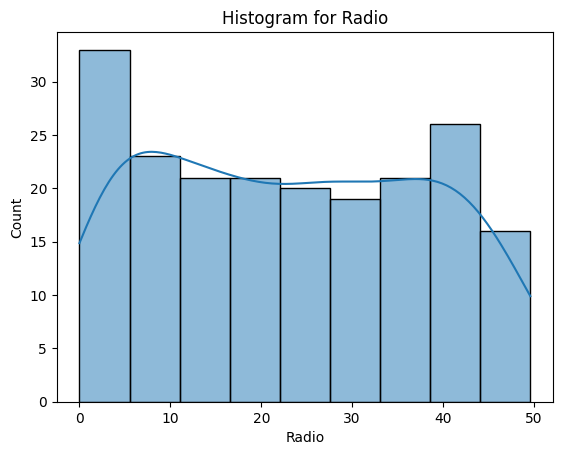

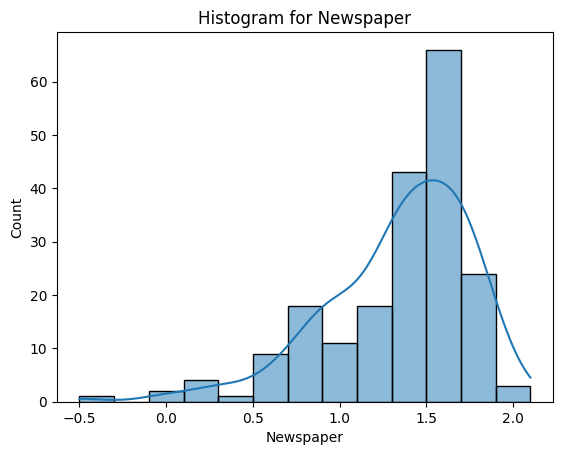

In [13]:
con = ['TV','Radio','Newspaper']
for i in con:
    sns.histplot(df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

Bivariate Analysis

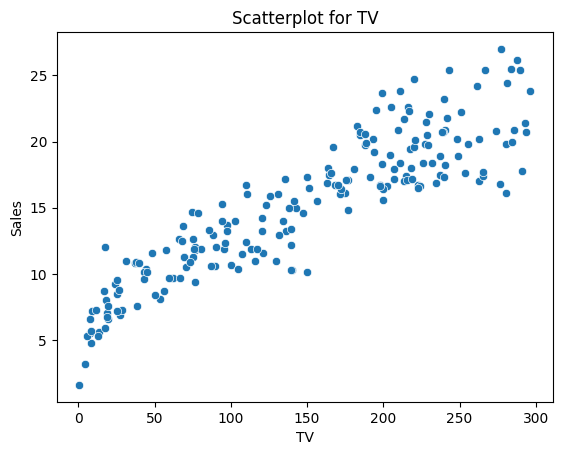

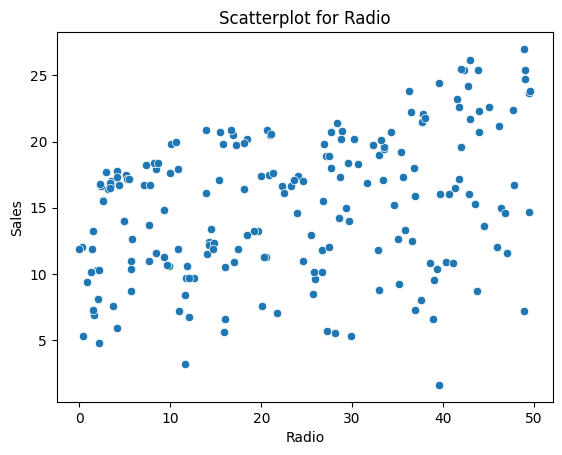

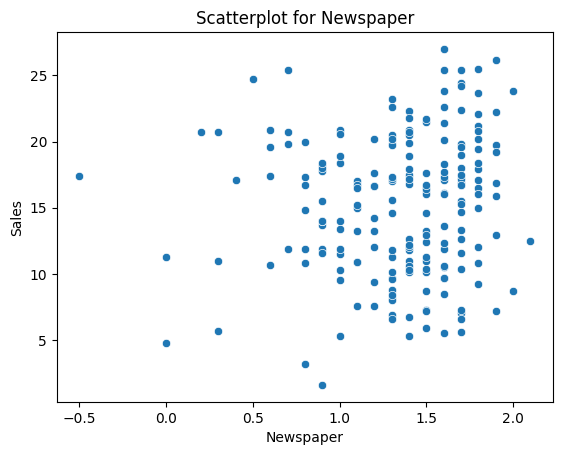

In [15]:
for i in con:
    sns.scatterplot(df,x=i,y='Sales')
    plt.title(f'Scatterplot for {i}')
    plt.show()

In [16]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.021676,0.901208
Radio,0.054809,1.000000,0.239488,0.349631
Newspaper,0.021676,0.239488,1.000000,0.101409
Sales,0.901208,0.349631,0.101409,1.000000


<Axes: >

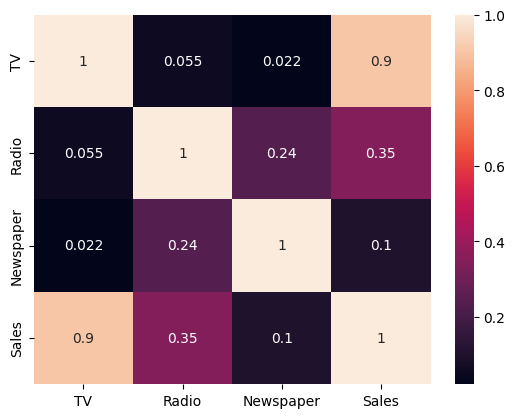

In [17]:
sns.heatmap(df.corr(),annot=True)

TV and Sales are highly correlated. Increase in TV ads can increase the number of sales

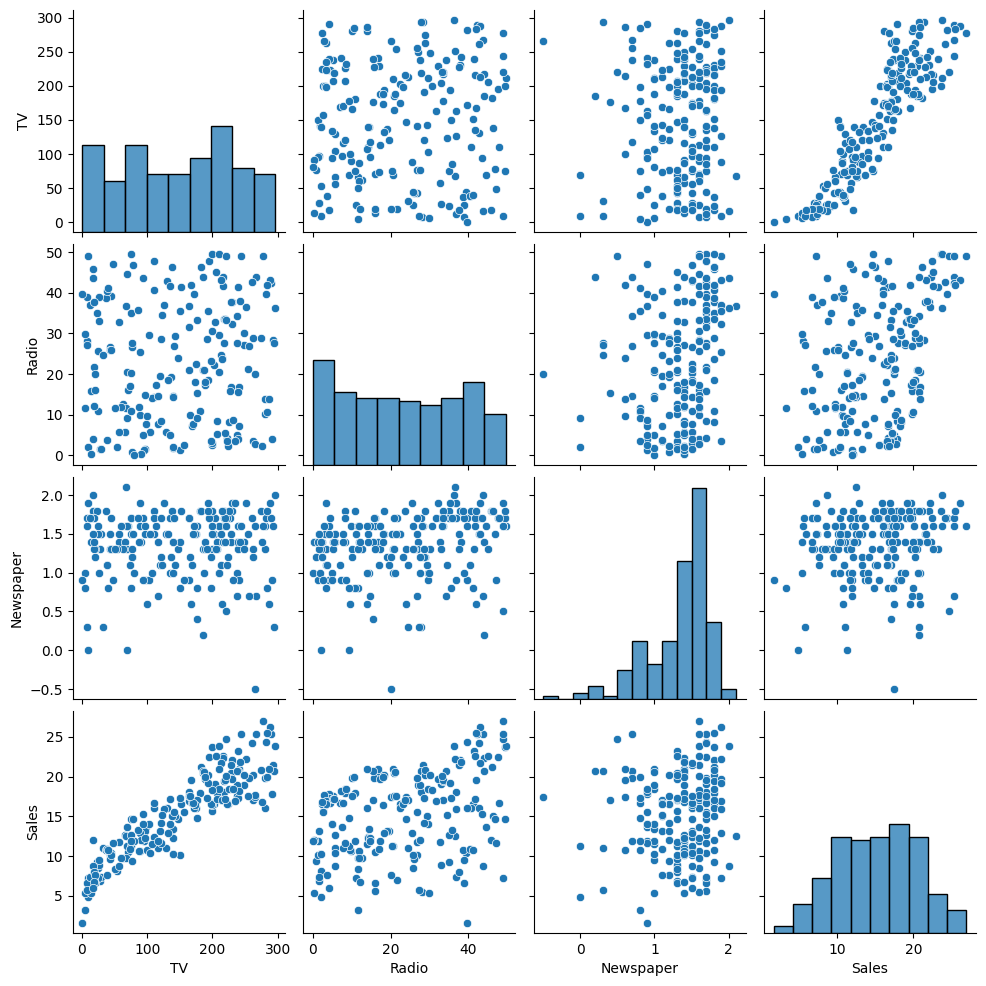

In [25]:
sns.pairplot(df)